# Heavy Traffic Indicators on I-94

## Interstate 94

Interstate 94 (I-94) is an east-west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. It lies along the primary overland route from Seattle to Toronto and is the only east-west Interstate highway to have a direct connection to Canada.

![](https://www.google.com/maps/vt/data=QgfFfHXqNNEl9B4PI2UY988qjqSzLtY8sBRFDwh867YvU8pwB42hE4yUPXmjvlcteznsrEPsCMWhD1Tn4HPECI5DQBPRKajDdJcKEmx_wGq9yuM6lud_XF4YaAZEzRI3TvLk_b2KbyJk9-bm1dIPXliJ9VSq4ksHIw8DoTMEXl4MmjMciW99LrPhKeOb3pPw6N_P6MWF93fHoD_soXmE1-E21sAJRxk_e15qIJFn7B7T826Y6oLmTlnb4HmZc2sacRbqW3wzgXy6idQD)

**Interstate 94 highlighted in red*

## Project and Data Overview

Our goal is to analyze I-94 traffic data made available by *John Hogue*, then determine a few indicators of heavy traffic. We will explore the associations between different columns in the dataset and create some visualizations. You can download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#).

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. The station only records cars moving from east to west. Hence **our results are limited to the westbound traffic in the proximity of that station**. They are not applicable to the entire I-94 highway.


Here is a description of the columns in the dataset:

- `holiday`:- US National holidays plus regional holidays 
- `temp`:- Average temperature in kelvin 
- `rain_1h`:- Amount in millimetres of rain that occurred in the hour 
- `snow_1h`:- Amount in millimetres of snow that occurred in the hour 
- `clouds_all`:- Percentage of cloud cover 
- `weather_main`:- Short textual description of the current weather 
- `weather_description`:- Longer textual description of the current weather 
- `date_time`:- Time of data collection in local CST time 
- `traffic_volume`:- Hourly I-94 ATR 301 reported westbound traffic volume

## Summary of Findings

Many circumstances can lead to long queues on roads, which explains why traffic has become a frequent sighting. We found that DateTime indicators are more important than weather indicators when considering westbound traffic on I-94. There are rush hours that commuters will want to avoid during workdays, and weekend travellers would benefit from knowing that there is a tendency for traffic to build up on Friday evenings before the calm observed at weekends.


Before we commence our analysis, Let's import some helpful python libraries for working with 2-dimensional data, pretty-printing dataframes and building visualizations:

## Importing Libraries

In [1]:
# Ignore future warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Useful libraries
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Defining Functions

Our analysis will involve a lot of repetitive tasks. To ensure an efficient workflow, we will automate some of these processes by creating functions that can execute defined aggregations, pretty-print tables, or build specific visualizations from passed arguments. The Code block below serves as a reference for all the functions used in this project:

In [2]:
def pretty_print(df, header):
    """
        Uses the tabulate library to pretty-print a dataframe.
        Params:
            :df (dataframe): dataframe of interest
            :header (list): list of column names
        Output:
            Returns pretty-printed dataframe with assigned column names.
    """
    print(tabulate(df, headers= header, tablefmt='psql', numalign="right"))

def group_column(df, col, aggr_col, new_col_name):
    """
        Groups dataframe by col then aggregates by mean of aggr_col.
        Params:
            :df (dataframe): dataframe of interest
            :col (string): name of column to group by
            :aggr_col (string): name of column to aggregate
            :new_col_name (string): name of the newly agreggated column.
        Output:
            Returns new dataframe grouped by col with mean of aggr_col
    """
    result = (df.groupby(col)[aggr_col]
                     .mean()
                     .reset_index(name= new_col_name)
             )
    return result

def create_histogram(df, column, main_title, hist_color):
    """
        Creates horizontal histogram from passed arguments
        Params:
            :df (dataframe): dataframe of interest
            :column (string): column to uses as xaxes
            :main_title (string): chart title
            :hist_color (string): color of histogram bars
        Output:
            Histogram with specified parameters
    """
    with sns.axes_style("darkgrid"):
        df[column].plot.hist(color = hist_color)
        plt.title(main_title, loc='left', fontstyle='italic', pad=20, fontsize=14, fontweight='bold')
        plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
        plt.ylabel('Frequency', labelpad=10, fontsize='12')
        plt.grid(False)
        plt.xlim(-100,7500)
        plt.ylim(0,8500)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.tick_params(direction='out')
        sns.despine()
        plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2) 

def create_line(df, x_val, y_val, main_title, x_title, line_color='#003a6d', xtype=None,
                x_limit=None, y_limit=None, ticks_x=None):
    """
        Creates a simple line chart from passed arguments
        Params:
            :df (dataframe): dataframe of interest
            :x_val (string): datafame column to plot on xaxes
            :y_val (string): dataframe column to plot on yaxes
            :main_title (string): chart title
            :x_title (string): xaxes title
            :line_color (string, hexcode): trendline color
            :xtype (string): type of data on xaxes ('day', 'month', 'year', 'day_of_week', 'day_hour', 'night_hour')
            :x_limit (tuple, list): limit of xaxes in format ([startpoint, endpoint])
            :y_limit (tuple, list): limit of yaxes in format ([startpoint, endpoint])
            :ticks_x (tuple, list): granular details of xaxes ticks in format([startpoint,..endpoint])
        Output:
            linechart with specified parameters
    """
    plt.plot(df[x_val], df[y_val], color= line_color, linewidth=3)
    plt.title(main_title, fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
    plt.xlabel(x_title, fontsize=12, labelpad=10)
    plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, color='black', alpha=0.1)
    sns.despine()
    
    # set xaxes ticks based on xtype value
    if xtype.lower()=='month':
        plt.xticks(range(1,13), rotation=30,
                   labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
        
    elif xtype.lower() == 'day_of_week':
        plt.xticks(range(0,7), rotation=30, 
                   labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
        
    elif xtype.lower() == 'day_hour':
        plt.xticks(range(7,19))
        
def merge_line_plots(df_list, main_title, x_limit, name_list=None, color_list=['#003a6d', '#fa4d56']):
    """
        Creates two line plots on a shared axes.
        Params:
            :df_list (tuple, list): list of two dataframes of to plot from
            :main_title (string): chart title
            :x_limit (tuple, list): limit of xaxes in format ([startpoint, endpoint])
            :name_list (tuple, list): list of two strings to use as legend names
            :color_list (tuple, list): list of two colors to use as trendline colors
        Output:
            merged linechart with 'hour' and 'avg_traffic' columns plotted from the df_list
    """
    plt.plot(df_list[0]['hour'], df_list[0]['avg_traffic'], 
             color= color_list[0], label=name_list[0], linewidth=4)
    plt.plot(df_list[1]['hour'], df_list[1]['avg_traffic'], 
             color= color_list[1], label=name_list[1], linewidth=4)
    plt.xlabel('Hour', fontsize=12, labelpad=10)
    plt.ylabel('Average Traffic', fontsize=12, labelpad=10)
    plt.title(main_title, fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
    plt.xlim(x_limit)
    plt.ylim(0,6500)
    plt.xticks(range(x_limit[0], x_limit[1]+1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, color='black', alpha=0.1)
    sns.despine()
    plt.legend()
        
def create_scatter(df, x_val, y_val, main_title, x_limit=None, dot_color='#1984c5'):
    """
        Creates a scatterplot from x_val and y_val.
        Params:
            :df (dataframe): dataframe containing columns of interest
            :main_title (string): chart title
            :x_val (string): datafame column to plot on xaxes
            :y_val (string): dataframe column to plot on yaxes
            :x_limit (tuple, list): limit of xaxes in format ([startpoint, endpoint])
            :dot_color (string, hexcode): color of points on scatterplot
        Output:
            A scatterplot from passed parameters
    """
    sns.relplot(data=day, x=x_val, y=y_val, color=dot_color)
    plt.title(main_title, fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
    plt.xlim(x_limit)
    plt.ylabel('Traffic Volume (cars/hr)',fontsize=12, labelpad=10)
    plt.xlabel('Temperature in Kelvin', fontsize=12, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

def create_barh(df, x_val, y_val,  main_title, size=None):
    """
        Creates horizontal bar chart from x_val and y_val.
        Params:
            :df (dataframe): dataframe containing columns of interest
            :x_val (string): datafame column for categorical variable
            :y_val (string): dataframe column for numerical value
            :main_title (string): chart title
            :size (list, tuple): chart size in the format (width, height)
        Output:
            An horizontal bar chart from passed parameters
    """
    bar_color = ['#1192e8' if (x < 5000) else '#fa4d56' for x in df[y_val]]
    df.plot.barh(x_val, y_val, legend=None, color=bar_color, figsize = size)
    plt.title(main_title, fontsize=14, fontweight='bold', pad=20, loc='left', fontstyle='italic')
    plt.ylabel(None)
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    sns.despine(left=True)
    plt.axvline(x = 0, color = '#333', linestyle = '-', linewidth=2)
    plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)

Now that we have imported useful libraries and defined our functions, we can read and explore our dataset with pandas:

## Exploring the Dataset

In [3]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Initial Notes
- *The traffic dataset contains **48,204 rows** and **9 columns**. No columns have null values.*
- *We have traffic information from 2012-10-02 at 9am to 2018-09-30 at 11pm.*
- *Numeric columns such as `temp`, `rain_1h`, `snow_h` and `clouds_all` do not have specified units of measurement. However, we have this information in our dataset description.*
- *The `date_time` column is stored as a string/object type rather than the DateTime type. Other colunms are assigned the correct data types*.
- *All columns follow the Python snake case naming convention*.

Let's fix the `date_time` column by converting its contents into Pandas Datetime objects:

In [6]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

## Analyzing Traffic Volume

To get a general overview of westbound traffic between Minneapolis and St Paul, we can plot a histogram to visualize the `traffic_volume` column. To understand this distribution in detail, we will also compute some descriptive statistics using the `.describe()` method:

+-------------+----------+
| statistic   |   values |
|-------------+----------|
| count       |    48204 |
| mean        |  3259.82 |
| std         |  1986.86 |
| min         |        0 |
| 25%         |     1193 |
| 50%         |     3380 |
| 75%         |     4933 |
| max         |     7280 |
+-------------+----------+


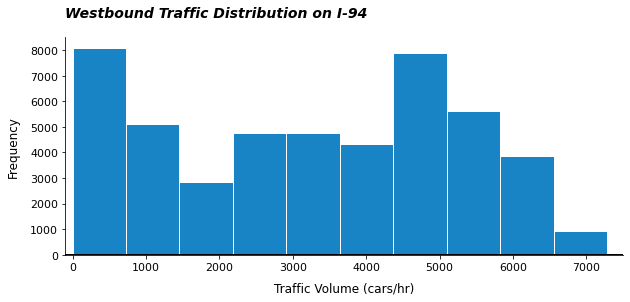

In [7]:
# Compute and print descriptive statistics
table = (metro['traffic_volume'].describe()).to_frame()
pretty_print(table, ['statistic', 'values'])

# Generate an histogram visual
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
create_histogram(metro, 'traffic_volume', 'Westbound Traffic Distribution on I-94', hist_color="#1984c5")
plt.show()

### Observations
- *Traffic volume around the station does not present with a skewed, uniform nor normal distribution. Infact, the distribution looks bimodal*
- *Hourly traffic volume varies between 0 to 7,280 cars per hour, averaging around 3,260 cars/hr. The mean and median values of the traffic distribution are also very close (mean: 3259, median: 3380)*
- *At the lower end of the distribution, traffic volumes between 0 - 1,500 cars/r are very common, while at the higher end, 4,500 - 5,000 cars are commonly seen on the road per hour. It is uncommon for traffic volumes to reach over 6,500 cars/hr.*
- *25% of the time, traffic volume is under 1,193 cars per hour. For the most part (75% of the time), there are lesser than 4,933 cars passing through the station every hour. Occassionally (about 25% of the time), heavy traffic may occur, with the station recording over 4,933 cars/hr.*

The bimodal nature of our histogram creates an interesting question to explore. Considering that there could be less action at nighttime than at day when people are usually active, could there be a time variable explanation for the two peaks that appeared on our histogram (each representing daytime and nighttime activity)? We will explore this possibility by comparing nighttime to daytime data.

## Traffic Volumes: Day vs Night

We'll start by dividing the dataset into two parts:
- `Daytime data`: hours from 7 a.m. to 7 p.m (non-inclusive)
- `Nighttime data`: hours from 7 p.m. to 7 a.m (non-inclusive)

This may not be the perfect criteria for distinguishing nighttime from daytime, but it can serve as a good starting point:

In [8]:
day = metro[(metro['date_time'].dt.hour >=7) & (metro['date_time'].dt.hour <19)]
night = metro[(metro['date_time'].dt.hour <7) | (metro['date_time'].dt.hour >=19)]

print('Our daytime data has: {:,} rows and {} columns'.format(day.shape[0], day.shape[1]))
print('Our daytime data has: {:,} rows and {} columns'.format(night.shape[0], night.shape[1]))

Our daytime data has: 23,877 rows and 9 columns
Our daytime data has: 24,327 rows and 9 columns


Now that we have extracted our daytime and nighttime data, let's visualize and compare their respective traffic distributions using an histogram. We will examine their descriptive statistics too:

+-------+-----------+-------------+
|       |   daytime |   nighttime |
|-------+-----------+-------------|
| count |     23877 |       24327 |
| mean  |   4762.05 |     1785.38 |
| std   |   1174.55 |     1441.95 |
| min   |         0 |           0 |
| 25%   |      4252 |         530 |
| 50%   |      4820 |        1287 |
| 75%   |      5559 |        2819 |
| max   |      7280 |        6386 |
+-------+-----------+-------------+


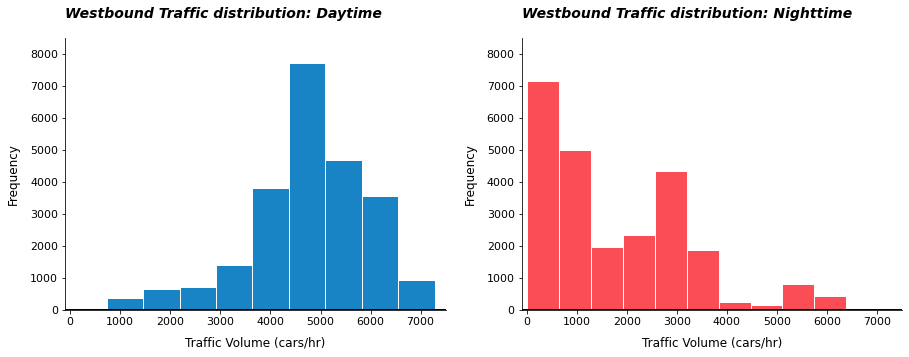

In [9]:
# Collate descriptive states for day and night into one dataframe
day_desc, night_desc = day[['traffic_volume']].describe(), night[['traffic_volume']].describe()
day_desc.columns= ['daytime']
day_desc['nighttime'] = night_desc
merged_desc = day_desc

pretty_print(merged_desc, 'keys')

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
create_histogram(day, 'traffic_volume','Westbound Traffic distribution: Daytime', '#1984c5')

plt.subplot(1,2,2)
create_histogram(night, 'traffic_volume','Westbound Traffic distribution: Nighttime', '#fa4d56')
plt.show()

### Observations
**Daytime Traffic:**
- *Distribution is left-skewed. Higher traffic volumes are much more common and the incidence of fewer traffic are very rare. The bulk of traffic lies in the range of 4,000 to 6,500 cars/hr*.

**Nighttime Traffic:**
- *Nighttime data shows a right skew, indicating an opposite pattern to daytime trends. At night, higher traffic volumes are less common. Infact, a considerable proportion of nighttime traffic lies between 0 to 3,000 vehicles per hour, much lesser than what was observed at daytime*

**Descriptive statistics of Daytime vs Nightime data also bolsters our claims**
- *Mean nighttime traffic is 1,785 cars/hr; far lower than the mean daytime traffic of 4,762 casrs/hr.*
- *75% of daytime traffic occurs in the range of 4,252 - 7,280 cars/hr.*
- *75% of the time, Nighttime traffic was lesser than 2,819 cars/hr.*

Considering that our goal to analyze the heavy traffic indicators, daytime data would be best suited for our analysis. We will focus on daytime traffic at first, then explore nighttime traffic afterwards.

## Time Indicators

One of the possible indicators of heavy traffic is time. It is possible to find more people on the road in a certain month, on a certain day, or at a certain time of the day. We are going to use line plots to explore how westbound traffic on I-94 has evolved, according to the following parameters:
- Month of the year
- Day of the week
- Hour of the day

### Daytime Traffic by Month

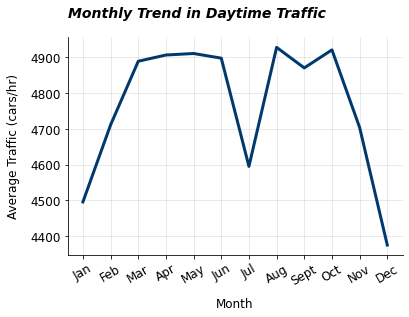

In [10]:
day['month'] = day['date_time'].dt.month

# Use the group column function to aggregate traffic_volume by month
month_traffic = group_column(day, 'month', 'traffic_volume', 'avg_traffic')

create_line(month_traffic, 'month', 'avg_traffic', 'Monthly Trend in Daytime Traffic',
            'Month', xtype='month')
plt.show()

### Observations

- *Traffic volumes vary between 4,000 and 5,000 cars per hour every month. August and October are noticeably the months with the highest traffic activity.*
- *Traffic is steadily high from March to June, while January, February, November and December record lower traffic volumes.*
- *Our observations would have led us to assume that traffic volumes are generally higher at warmer periods than in the colder seasons (December, January and February). However, the notable traffic decrease in July affects our ability to conclude.*

One could propose that the decreased traffic volume in July is attributed to the summer holidays around that period. However, June and August are also summer holiday months, and they do not seem to be affected by the trend. This suggests another probable cause. Let's explore our data for more insights. A good place to start is to check how traffic volumes have evolved over the years in July:

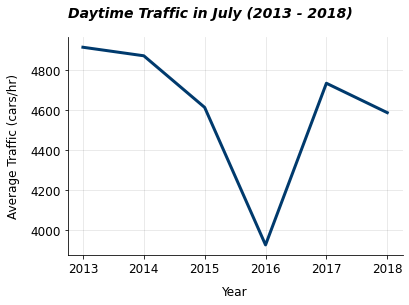

In [11]:
day['year'] = day['date_time'].dt.year
july_data = day[day['month'] == 7]

july_traffic = group_column(july_data, 'year', 'traffic_volume', 'avg_traffic')

create_line(july_traffic, 'year', 'avg_traffic', 'Daytime Traffic in July (2013 - 2018)',
            'Year', xtype='year')
plt.show()

### Observation

- *On average, the traffic volume in July ranges from around 4,600 to 4800 cars per hour (similar to other summer months). However, there was a significant decrease (below 4,000 cars) in July, 2016.*

This occurrence might explain the low average we previously observed for July. Could a particular event have happened in 2016 to affect traffic volumes? Let's explore daytime traffic over all the months in 2016: 

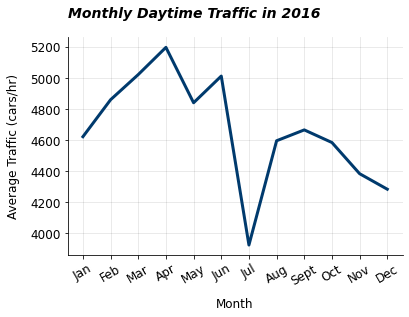

In [12]:
traffic_2016 = day[day['year'] == 2016]
month_2016 = group_column(traffic_2016, 'month', 'traffic_volume', 'avg_traffic')

create_line(month_2016, 'month', 'avg_traffic', 'Monthly Daytime Traffic in 2016',
            'Month', xtype='month')
plt.show()

### Observation

- *Average Daytime traffic was generally above 4,000 cars/hr except in July where traffic volumes dipped even below the winter months (December, January and February)*

July 2016 looks undoubtedly interesting. Something significant must have happened to cause this drop in traffic activity. Next, let's explore traffic activity over all the days in July 2016:

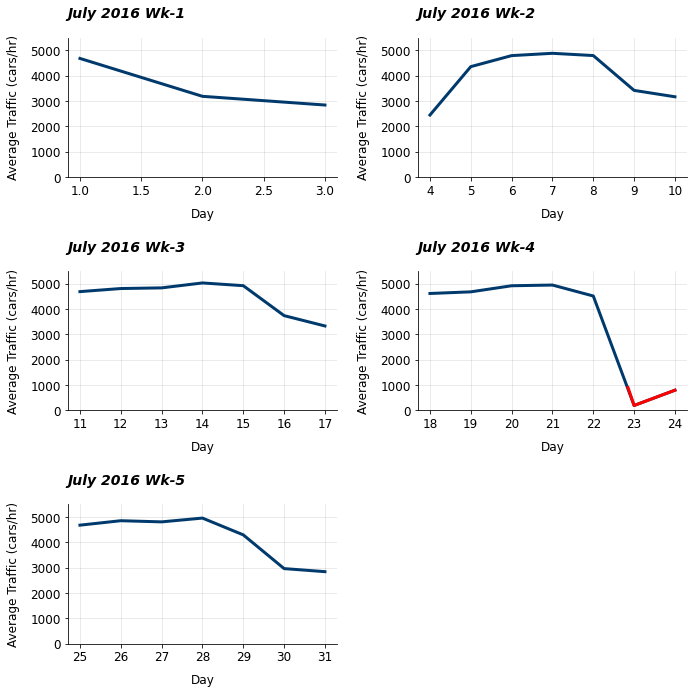

In [13]:
traffic_2016['day'] = traffic_2016['date_time'].dt.day
july_2016 = traffic_2016[traffic_2016['month'] == 7]

# Create a column containing the exact number in July
july_2016['week'] = (july_2016['date_time'].dt.week - 26) + 1 

july_traffic = (july_2016.groupby(['day', 'week'])['traffic_volume']
            .mean()
            .reset_index(name='avg_traffic')
       )

# Extract each distinct week from July 2016
wk_1 = july_traffic.query("week ==1")
wk_2 = july_traffic.query("week ==2")
wk_3 = july_traffic.query("week ==3")
wk_4 = july_traffic.query("week ==4")
wk_5 = july_traffic.query("week ==5")

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
create_line(wk_1, 'day', 'avg_traffic', 'July 2016 Wk-1', 'Day', xtype='other', 
            y_limit=(0,5500), ticks_x=range(1,4))

plt.subplot(3,2,2)
create_line(wk_2, 'day', 'avg_traffic', 'July 2016 Wk-2', 'Day', xtype='other', 
            y_limit=(0,5500), ticks_x=range(4,11))

plt.subplot(3,2,3)
create_line(wk_3, 'day', 'avg_traffic', 'July 2016 Wk-3', 'Day', xtype='other', 
            y_limit=(0,5500), ticks_x=range(11,18))

plt.subplot(3,2,4)
create_line(wk_4, 'day', 'avg_traffic', 'July 2016 Wk-4', 'Day', xtype='other', 
            y_limit=(0,5500), ticks_x=range(18,25))
# Emphasize the low traffic activity on July 23 and 24
plt.plot([22.85,23,24], [900, 197.173913, 800.166667], color='r', linewidth=3)

plt.subplot(3,2,5)
create_line(wk_5, 'day', 'avg_traffic', 'July 2016 Wk-5', 'Day', xtype='other', 
            y_limit=(0,5500), ticks_x=range(25,32))

plt.tight_layout(pad=2.0)

### Observation

- *Something unusual happened on the 23rd and 24th of July 2016 where traffic volumes plunged lesser than 1,000 cars per hour. There could have been a road construction at the time, a conflict, or an accident, which could have significantly reduced traffic activity.*

A quick search of 23rd and 24th July 2016 with the keywords I-94 construction will yeild some favourable results. It appears that road construction activities took place on the interstate road around that period. You can find more information about this construction work at the [Department of transportation 2016 weekly updates](https://www.dot.state.mn.us/d4/projects/alexi94hwy29/weekly.html) and in [The crain's detroit business page](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).

### Week Day and Daytime Traffic

Earlier, we generated a line plot to explore how traffic volume changed each month on average. We'll now continue by building line plots for another time unit: the day of the week.

To get the traffic volume averages for each day of the week, we will use the handy method `.dt.dayofweek()` to extract the day of the week from the `date_time` column. The resulting values will be a range of possible weekdays from monday (0) to Sunday (6):

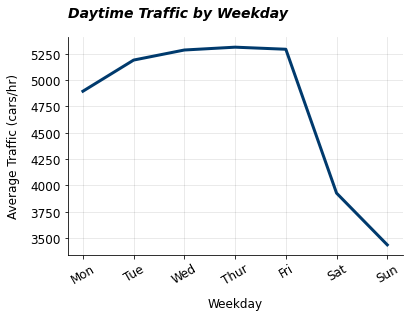

In [14]:
day['day_of_week'] = day['date_time'].dt.dayofweek

weekday_traffic = group_column(day, 'day_of_week', 'traffic_volume', 'avg_traffic')

create_line(weekday_traffic, 'day_of_week', 'avg_traffic', 'Daytime Traffic by Weekday',
            'Weekday', xtype='day_of_week')
plt.show()

### Observation

- *Traffic is generally higher on working days (Mondays to Fridays), with average traffic volumes around 5,000 cars/hr. Weekends (Saturday and Sunday) show lower traffic activity (less than 4,000 cars/hr).*

The higher traffic activity on working days may be due to people leaving their homes for work or returning. To investigate this idea, we could check the exact periods of the day when higher traffic volumes are recorded. If our assumption is correct, we should observe particular spikes in traffic activity during rush hours when people are expected to go to work or return home.

### Daytime Traffic and Hour of Day

We will try to generate a line plot for the time of day. The weekends, however, will pull down the average values, since they generally record less traffic activity. To prevent this from happening, we will visualize the averages separately. 

We will start by splitting the data based on the day type: business day or weekend. To do this, we will use the `dataframe.query()` method. This returns a filtered dataframe based on the results of a boolean expression:

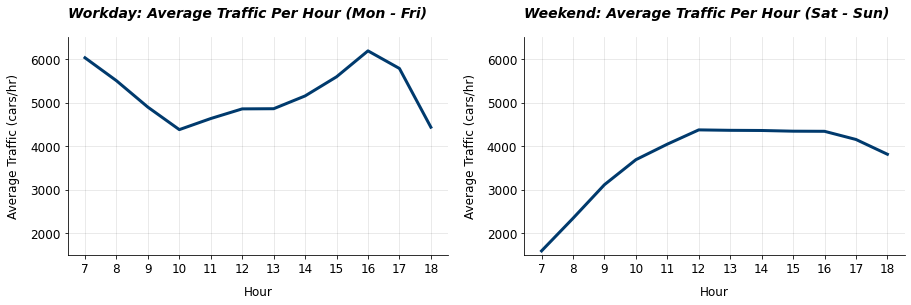

In [15]:
day['hour'] = day['date_time'].dt.hour

# Select data from Monday(0) to Friday(4)
workday = day.query("day_of_week <= 4")
# Select the weekends Saturday(5) and Sunday(6)
weekend = day.query("day_of_week > 4")

workday_traffic = group_column(workday, 'hour', 'traffic_volume', 'avg_traffic')
weekend_traffic = group_column(weekend, 'hour', 'traffic_volume', 'avg_traffic')


plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
create_line(workday_traffic, 'hour', 'avg_traffic', 'Workday: Average Traffic Per Hour (Mon - Fri)',
            'Hour', xtype='day_hour', y_limit=[1500,6500])

plt.subplot(1,2,2)
create_line(weekend_traffic, 'hour', 'avg_traffic', 'Weekend: Average Traffic Per Hour (Sat - Sun)',
            'Hour', xtype='day_hour', y_limit=[1500,6500])

plt.show()

### Observation
- *Our workday chart has two peaks corresponding to 7 am and 4 pm (both recording over 6,000 cars/hr). This implies that the expected rush hours are 7 am when most people leave for work and 4 pm when people start to head back home.*
- *The weekend shows a notably different pattern. Traffic volumes are lower compared to the workdays. There is no increase in traffic activity at 7am. There is a tendency for people to sleep or rest in their homes after the long weeks work.*
- *Mild traffic builds up on weekend afternoons between 12 pm and 4 pm (around 4,500 cars/hr). This is understandable, considering that the period corresponds to weekend leisure hours.*

### Findings from Time Data Analysis of Daytime Traffic
- The westbound route is busier in warmer months.
- A construction activity took place on I-94 between 23rd and 24 July 2016. During this period, road activity was minimal.
- The road is busier on business days than weekends.
- On business days, rush hours are 7am and 4pm. They are generally busier than other hours.

## Weather Indicators

Another possible indicator of heavy traffic is weather. Our dataset provides us with a few useful columns about weather. Some of these columns are numerical while the others are categorical:

- **Numerical columns**: `temp`, `rain_1h`, `snow_1h` and `clouds_all`.

- **Categorical columns**: `weather_main`  and `weather_description`.


### Numerical Weather Indicators
Let's start by examining the correlation of numerical columns with traffic volume. We will use the `Dataframe.corr()` method.

In [16]:
day[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

Only temperature shows some degree of correlation with traffic volume (approximately 0.13). This correlation is very minimal and we will attempt to demonstrate it using a scatterplot:

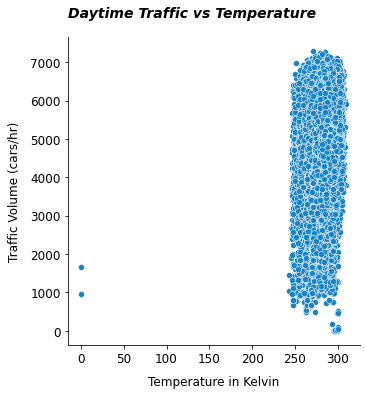

In [17]:
create_scatter(day, 'temp', 'traffic_volume', 'Daytime Traffic vs Temperature')
plt.show()

We have two points on the scatterplot with zero temperature. This is quite unusual. We will plot the graph again, ignoring the zero temperature. Let's set our x-axis limit to a range that is more representative of our data.

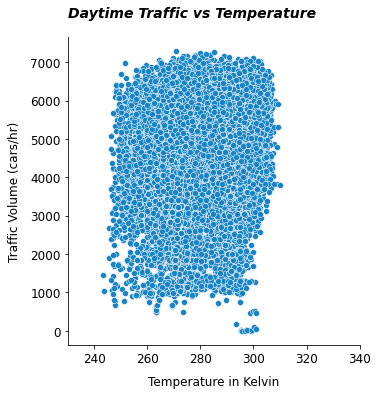

In [18]:
create_scatter(day, 'temp', 'traffic_volume', 'Daytime Traffic vs Temperature', x_limit=[230,340])
plt.show()

It appears that there isn't a strong correlation to conclude anything  useful about temperature and traffic volume. Let's turn our attention to the categorical columns: `weather_main` and `weather description`.

### Categorical Weather Indicators

We will calculate the average traffic volume associated with each unique weather type and weather description, then visualize our findings.

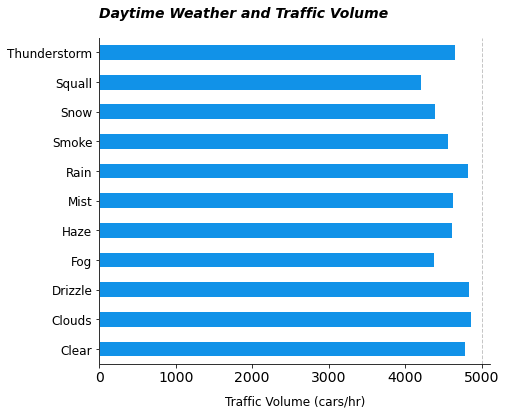

In [19]:
weather_type = group_column(day, 'weather_main', 'traffic_volume', 'avg_traffic')
create_barh(weather_type, 'weather_main', 'avg_traffic','Daytime Weather and Traffic Volume', size=(7,6))
plt.show()

### Observation

- *For time indicators, we considered heavy traffic when we observed averages of over 5,000 cars/hr. No weather category seems to cause traffic that exceeds the 5,000 mark.*
- *On cloudy, drizzly, rainy and clear days, traffic approaches 5,000 cars/hr. However, there is still not enough evidence to conclude the relationship between weather types and heavy traffic.*

Let's explore the more detailed weather description column to see if we can draw some additional insights:

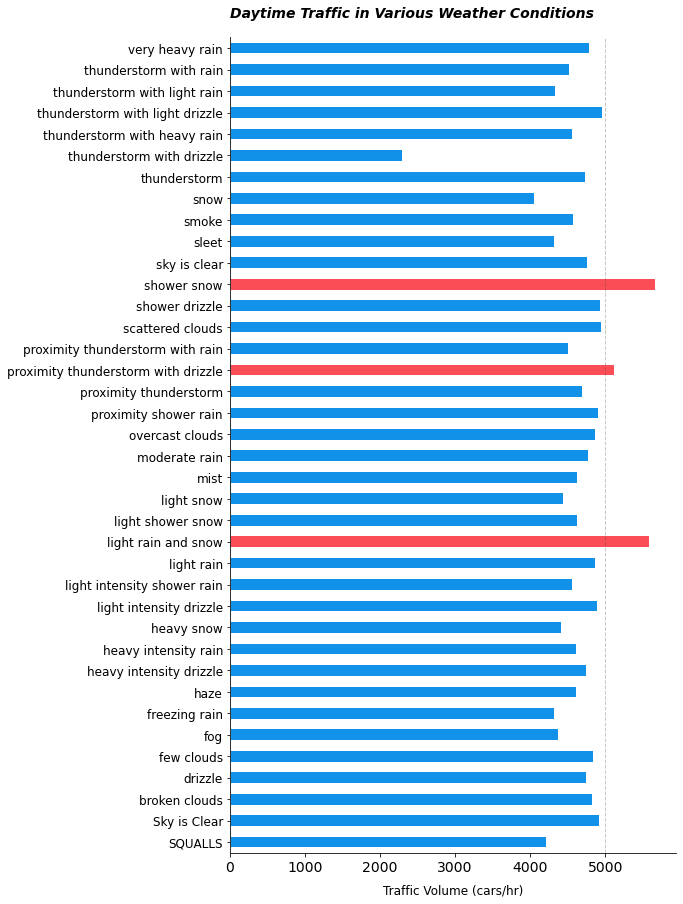

In [20]:
weather_desc = group_column(day, 'weather_description', 'traffic_volume', 'avg_traffic')

create_barh(weather_desc, 'weather_description', 'avg_traffic',
            'Daytime Traffic in Various Weather Conditions', size=(8,15))

### Observations

- *There are three weather situations where traffic volume exceeds 5,000 cars:*
    - *Shower snow*.
    - *Light rain and snow*.
    - *Proximity thunderstorm with drizzles*.
- *These situations point to bad weather. In bad weather, people may prefer to commute through cars for safety reasons, rather than using  alternatives like bikes or long walks. On careful inspection, we can see some other extreme days where people did not exhibit similar behaviours (for example, during thunderstorms with heavy rain). This makes it hard to conclude the underlying reasons for sure.*

Next, we will turn our attention to some possible traffic indicators at Nighttime.

## Traffic Indicators at Nighttime

### Nightime Traffic by Month

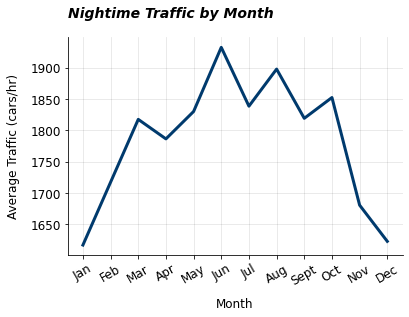

In [21]:
night['month'] = night['date_time'].dt.month
month_traffic = group_column(night, 'month', 'traffic_volume', 'avg_traffic')

create_line(month_traffic, 'month', 'avg_traffic', 'Nightime Traffic by Month',
            'Month', xtype='month')
plt.show()

### Observation
- *The highest nighttime traffic occurs in June, July, and August (the summer months). Summer months are generally known to have longer days, encouraging people to stay out longer and return home late, hence the relatively busier roads at night.*

### Weekday and Nightime Traffic

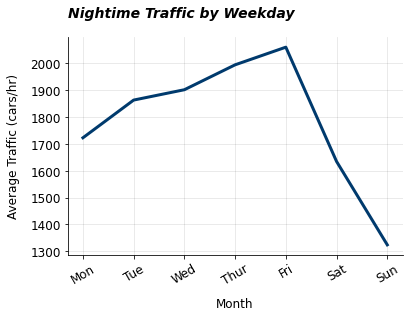

In [22]:
night['day_of_week'] = night['date_time'].dt.dayofweek

weekday_traffic = group_column(night, 'day_of_week', 'traffic_volume', 'avg_traffic')

create_line(weekday_traffic, 'day_of_week', 'avg_traffic', 'Nightime Traffic by Weekday',
            'Month', xtype='day_of_week')
plt.show()

### Observation
- *Traffic is highest on Friday nights and minimal during weekends. This might be due to the tendency of people to engage in leisure activities on Friday evenings, after the long working week. People may decide to go clubbing, visit restaurants or have dinner with their friends and families.*

Let's investigate further by exploring nightime traffic during the working days and weekends. We will analyse the nighttime traffic in two aspects:
- `Dusk`: Categorized as nighttime period before 00:00 hrs
- `Dawn`: Nightime periods from 00:00 hrs to 07:00 hrs (inclusive)

**Note:** *These categories are mainly assigned for convenience, one may decide to come up with a much better definition of dawn and dusk than the one used in this analysis*.

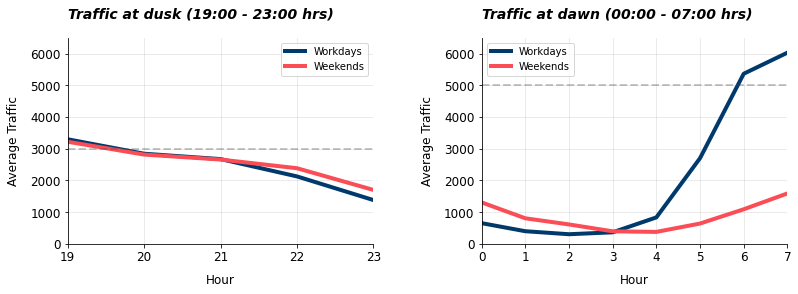

In [23]:
# Adjusted night contains 07:00 hours as oppossed to the night dataframe
adj_night = metro[(metro['date_time'].dt.hour <=7) | (metro['date_time'].dt.hour >=19)]

# Add hour and day of week to adjusted night dataframe
adj_night['day_of_week'] = adj_night['date_time'].dt.dayofweek
adj_night['hour'] = adj_night['date_time'].dt.hour

# Filter dusk (19:00 - 23:00) and dawn (00:00 - 06:00) hours for workdays
workday_dusk = adj_night.query("(hour >= 19) & (day_of_week <=4)")
workday_dawn = adj_night.query("(hour < 19) & (day_of_week <=4)")

#Filter dusk (19:00 - 23:00) and dawn (00:00 - 06:00) hours for weekends
weekend_dusk = adj_night.query("(hour >= 19) & (day_of_week >4)")
weekend_dawn = adj_night.query("(hour < 19) & (day_of_week >4)")

# Calculate average traffic volume per hour accross all groups
workday_dusk_traffic = group_column(workday_dusk, 'hour', 'traffic_volume', 'avg_traffic')
workday_dawn_traffic = group_column(workday_dawn, 'hour', 'traffic_volume', 'avg_traffic')
weekend_dusk_traffic = group_column(weekend_dusk, 'hour', 'traffic_volume', 'avg_traffic')
weekend_dawn_traffic = group_column(weekend_dawn, 'hour', 'traffic_volume', 'avg_traffic')

dusk_list = [workday_dusk_traffic, weekend_dusk_traffic]
dawn_list = [workday_dawn_traffic, weekend_dawn_traffic]
names = ['Workdays', 'Weekends']

# Visualize data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
merge_line_plots(dusk_list, 'Traffic at dusk (19:00 - 23:00 hrs)', x_limit=(19,23), name_list=names)
plt.axhline(y = 3000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)

plt.subplot(1,2,2)
merge_line_plots(dawn_list, 'Traffic at dawn (00:00 - 07:00 hrs)', x_limit=(0,7), name_list=names)
plt.axhline(y = 5000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)

plt.tight_layout(pad=4.0)
plt.show()

### Observations
- **Dusk:**
    - *Generally, there is not much difference between traffic volumes at dusk during working days and weekends. However, it is obvious that it takes a little longer for traffic activity to cool down during the weekends. This may be caused by the tendency of people to stay out late on weekends.*
- **Dawn:**
    - *There are glaring differences in traffic activity at dawn. At the early hours of dawn (12am to 2pm), traffic cools down faster on workdays than weekends. People are much more likely to return home early on workdays.*
    - *Traffic activity starts to build up again at 4am on workdays, then peaks between 6am and 7am. This may be explained by the tendency of people to get up early and leave for work. We do not observe such pattern on weekends.*

Earlier, we had noticed a peak in traffic activity on Friday nights. We suspect that these nights might be bustling with higher road activity than other nights. We will evaluate this opinion by comparing traffic on Friday nights to other nights.

### Are Friday Nights Busier Than Other Nights?

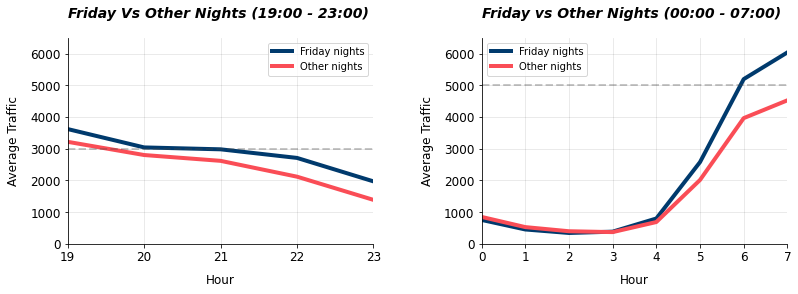

In [24]:
# Filter dusk (19:00 - 23:00) and dawn (00:00 - 06:00) hours for Fridays
friday_dusk = adj_night.query("(hour >= 19) & (day_of_week == 4)")
friday_dawn = adj_night.query("(hour < 19) & (day_of_week ==4)")

# Filter dusk (19:00 - 23:00) and dawn (00:00 - 06:00) hours for other days
others_dusk = adj_night.query("(hour >= 19) & (day_of_week !=4)" )
others_dawn = adj_night.query("(hour < 19) & (day_of_week !=4)" )

# Calculate average traffic volume per hour accross all groups
friday_dusk_traffic = group_column(friday_dusk, 'hour', 'traffic_volume', 'avg_traffic')
friday_dawn_traffic = group_column(friday_dawn, 'hour', 'traffic_volume', 'avg_traffic')
others_dusk_traffic = group_column(others_dusk, 'hour', 'traffic_volume', 'avg_traffic')
others_dawn_traffic = group_column(others_dawn, 'hour', 'traffic_volume', 'avg_traffic')

dusk_list = [friday_dusk_traffic, others_dusk_traffic]
dawn_list = [friday_dawn_traffic, others_dawn_traffic]
names = ['Friday nights', 'Other nights']

# Build visual
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
merge_line_plots(dusk_list, 'Friday Vs Other Nights (19:00 - 23:00)', x_limit=(19,23), name_list=names)
plt.axhline(y = 3000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)

plt.subplot(1,2,2)
merge_line_plots(dawn_list, 'Friday vs Other Nights (00:00 - 07:00)', x_limit=(0,7), name_list=names)
plt.axhline(y = 5000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)

plt.tight_layout(pad=4.0)
plt.show()

### Observation
- **At Dusk:**
    - *Traffic takes longer to cool off on Fridays.* 
    - *Traffic volume remains above 3,000 cars/hr on Fridays until 22:00 hrs. On other nights, traffic reduces below 3,000 cars/hrs as early as 20:00 hrs.*
- **At Dawn:**
    - *Both Friday and other days show increased traffic activity starting from 04:00 hrs to 07:00 hrs. This increase for friday nights might be due to people returning home from late night activities*
    - *The relatively reduced traffic activity on other days, at dawn, might be due to some weekend days (saturdays and sundays) pulling down the average values of the working days.*
    
## Weather Indicators of Nightime Traffic

### Numerical Indicators

In [25]:
night[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

There appears to be no solid correlation between any of the numerical indicators and traffic volume. However, we can attempt to visualize the relationship between temperature and traffic volume since it appears relatively stronger than the others:

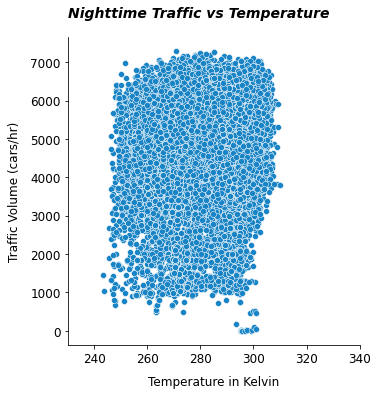

In [26]:
create_scatter(night, 'temp', 'traffic_volume', 'Nighttime Traffic vs Temperature', 
               x_limit=[230,340])
plt.show()
plt.show()

Its clear that there is no correlation between temperature and Nighttime traffic.

### Categorical Weather Indicators

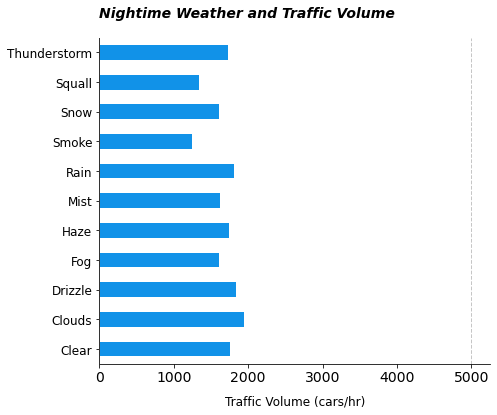

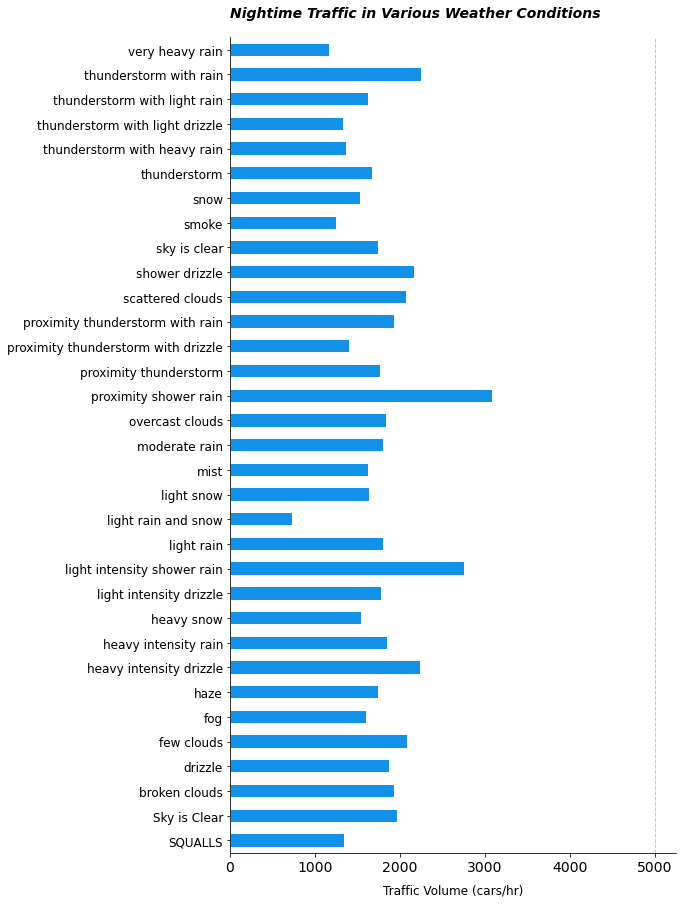

In [27]:
weather_type = group_column(night, 'weather_main', 'traffic_volume', 'avg_traffic')
create_barh(weather_type, 'weather_main', 'avg_traffic','Nightime Weather and Traffic Volume', 
            size=(7,6))
plt.show()

weather_desc = group_column(night, 'weather_description', 'traffic_volume', 'avg_traffic')
create_barh(weather_desc, 'weather_description', 'avg_traffic',
            'Nightime Traffic in Various Weather Conditions', size=(8,15))
plt.show()

### Observation

- *The bar graphs do not show any weather type as a significant indicator of nighttime traffic. Although two weather descriptions (proximity shower rain and light intensity shower rain) show some correlation with increased traffic than the others, the correlation is not significant enough to identify them as heavy traffic indicators.*

Finally, let's make sense of all the information we have gleaned through analysis:

## Recommendations for Avoiding Westbound Congestion

With an average of about 3,300 cars, vans, buses, lorries and motorbikes on the westbound road every hour, a certain degree of congestion is simply inescapable.

- Traffic is exacerbated during peak hours (7 am and 4 pm) from Mondays to Fridays – when commuters are heading to and from work or when parents are driving their kids to school. The key is to be flexible with timing. Our analysis has shown that leaving home anytime between 4 am - 6 am can help reduce the chances of being stuck in the mornings. However, it is advisable to leave home before 6 am in the summer months since traffic is generally higher during these periods.

- For those looking to set off to visit family for the weekends, Friday evenings might not be the best time to leave. We have identified more traffic on Friday nights than other nights, and the traffic takes longer to cool off. Saturdays might be a better alternative. Traffic is generally lower during weekends.

- One should travel only when necessary in bad daytime weather. Our analysis shows some correlations between bad weather and traffic volume during the day. The pattern may not be perfectly predictable, but vehicles can get stuck on the road, leading to more traffic.

- Finally, commuters should not be afraid to take less familiar routes. If the westbound road seems overly congested, commuters could consider an alternative way. It may be longer in terms of miles covered, but it might help avoid the worst of the congestion, and on some days, one might arrive at his destination even earlier. Plus, who knows what new adventures the road might bring?


## Conclusion

In this project, we aimed to find a few indicators of heavy traffic on the I-94 Interstate highway (westbound route). We observed that Datetime indicators are more relevant than weather indicators during daytime and nighttime. 
- Traffic is heavier in rush hours, 7 am and 4 pm.
- Traffic is more on workdays than weekends.
- Warmer months have more traffic than colder months.
- Friday nights are busier than other nights on average.
- Its hard to tell how weather and traffic intensity relate.

## Prompts for Further Exploration

- Are some public holidays associated with higher traffic volumes than others